# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [3]:
data=pd.read_csv("Churn_Modelling.csv")

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()#10000 entries with total 14 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
x=data.iloc[:,3:13].values
y=data.iloc[:,-1].values

# Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [8]:
x[:,2]=lb.fit_transform(x[:,2])#Encoding "Gender"

In [9]:
x

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [11]:
ohe=OneHotEncoder()

In [12]:
ct=ColumnTransformer(transformers=[('oh',ohe,[1])],remainder="passthrough")

In [13]:
x=ct.fit_transform(x)#Encoding "Geography"

In [14]:
x=x[:,1:]

In [15]:
x.shape

(10000, 11)

# Split to Train-test

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
x_train.shape,x_test.shape

((8000, 11), (2000, 11))

# Scaling

#### NN uses gradient descent approach, needs scaling/ normalization

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
ss=StandardScaler()

In [20]:
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

#Building ANN Model

In [21]:
#--Libraries--
from keras.models import Sequential #Create empty NN model
from keras.layers import Dense #normal NN layer

In [ ]:
#--Init the NN model--
model=Sequential()

**Input Layer**


In [22]:
x_train.shape[1] #input_dim

11

In [23]:
#Add layers by using add() of Sequential class
model.add(Dense(input_dim=11,kernel_initializer='random_uniform',activation='relu',units=20))

**Hidden Layer**

In [24]:
model.add(Dense(kernel_initializer='random_uniform',activation='relu',units=15))
model.add(Dense(kernel_initializer='random_uniform',activation='relu',units=15))

**Output Layer**

In [25]:
model.add(Dense(kernel_initializer='random_uniform',activation='sigmoid',units=1))

Compile the model (after defining structure, prior to training)- Define strategies for training process

In [26]:
#Loss calc strategy: LogLoss/BinaryCrossEntropy, Optimizer, Metrics
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=["accuracy"])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 811
Trainable params: 811
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.utils.vis_utils import plot_model

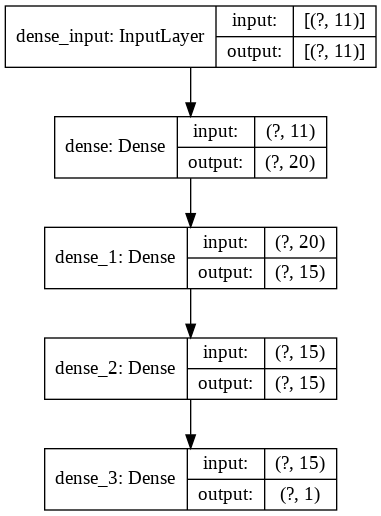

In [29]:
plot_model(model,show_shapes=True,show_layer_names=True)

#Train the Model

In [30]:
train_history=model.fit(x_train,y_train,batch_size=32,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5249 - accuracy: 0.7928 - val_loss: 0.4179 - val_accuracy: 0.8035
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.7945 - val_loss: 0.4088 - val_accuracy: 0.8035
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.7945 - val_loss: 0.4050 - val_accuracy: 0.8035
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8006 - val_loss: 0.4041 - val_accuracy: 0.8265
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8292 - val_loss: 0.3995 - val_accuracy: 0.8350
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8315 - val_loss: 0.3967 - val_accuracy: 0.8355
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4091 - accuracy: 0.8350 - val_loss: 0.3907 - val_accuracy: 0.8390
Epoch 

#Test model

In [31]:
y_pred=model.predict(x_test)

In [32]:
y_pred

array([[0.0709385 ],
       [0.01321504],
       [0.17603108],
       ...,
       [0.7818836 ],
       [0.09202883],
       [0.18558222]], dtype=float32)

In [33]:
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [34]:
y_pred=y_pred>0.5


In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,y_pred)#same as val_accuracy after 100th epoch

0.857

#Real-Time Prediction

In [37]:
cust_data=np.array([[0,0,700,1,26,1,50000,3,1,1,80000]])

In [38]:
cust_data=ss.transform(cust_data)

In [39]:
cust_data

array([[-0.57946723, -0.57638802,  0.50178794,  0.91324755, -1.22622052,
        -1.38944225, -0.41792108,  2.53355998,  0.64920267,  0.97481699,
        -0.3552321 ]])

In [40]:
model.predict(cust_data)>0.5

array([[False]])

#Model Performance Evaluation 

In [41]:
train_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

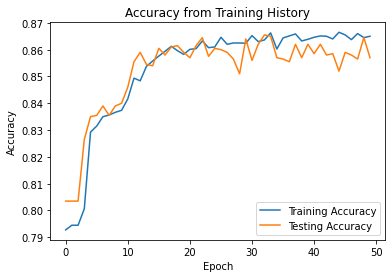

In [42]:
plt.plot(train_history.history['accuracy'],label="Training Accuracy")
plt.plot(train_history.history['val_accuracy'],label="Testing Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy from Training History")
plt.show()

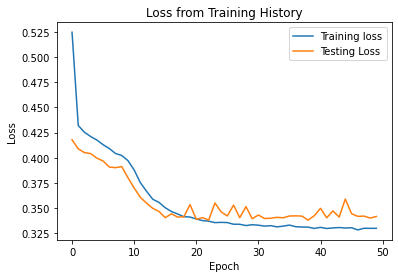

In [43]:
plt.plot(train_history.history['loss'],label="Training loss")
plt.plot(train_history.history['val_loss'],label="Testing Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss from Training History")
plt.show()

#Save the model

In [44]:
model.save("bank_churn.h5")

In [45]:
#Save Scalar object
import joblib

In [46]:
joblib.dump(ss,"bk_scalar.save")

['bk_scalar.save']